In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric

In [2]:
from transpile_benchy.library import CircuitLibrary

# library = CircuitLibrary.from_txt("../medium_circuits.txt")
library = CircuitLibrary.from_txt("qft.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, name="SABREMS-MinSwaps", cost_function="basic"),
    SabreMS(coupling_map, name="SABREMS-MinDepth"),
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=10,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/8 [00:00<?, ?it/s]

Loading qft_n4 from QASMBench


Circuits from library:  12%|█▎        | 1/8 [01:00<07:04, 60.70s/it]

Loading qft_n6 from MQTBench


Circuits from library:  25%|██▌       | 2/8 [02:08<06:27, 64.65s/it]

Loading qft_n8 from MQTBench


Circuits from library:  38%|███▊      | 3/8 [03:26<05:55, 71.02s/it]

Loading qft_n10 from MQTBench


Circuits from library:  50%|█████     | 4/8 [05:02<05:22, 80.75s/it]

Loading qft_n16 from MQTBench


Circuits from library:  62%|██████▎   | 5/8 [07:55<05:42, 114.23s/it]

Loading qft_n18 from QASMBench


Circuits from library:  75%|███████▌  | 6/8 [11:26<04:54, 147.13s/it]

Loading qft_n32 from MQTBench


Circuits from library:  88%|████████▊ | 7/8 [21:42<05:00, 300.39s/it]

Loading qft_n34 from MQTBench


Circuits from library: 100%|██████████| 8/8 [33:43<00:00, 252.91s/it]


In [5]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -36.48797289178994,
  'best_circuit': 'qft_n10',
  'worst_circuit': 'qft_n18'},
 'monodromy_total': {'average_change': -23.844918417593174,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'qft_n18'},
 'total_runtime': {'average_change': 2071.9324973607613,
  'best_circuit': 'qft_n32',
  'worst_circuit': 'qft_n4'}}

In [8]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'monodromy_depth': {'average_change': -1.8900337917611465,
  'best_circuit': 'qft_n32',
  'worst_circuit': 'qft_n10'},
 'monodromy_total': {'average_change': 0.28101772829524646,
  'best_circuit': 'qft_n16',
  'worst_circuit': 'qft_n10'},
 'total_runtime': {'average_change': 1.2479920630692574,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n34'}}

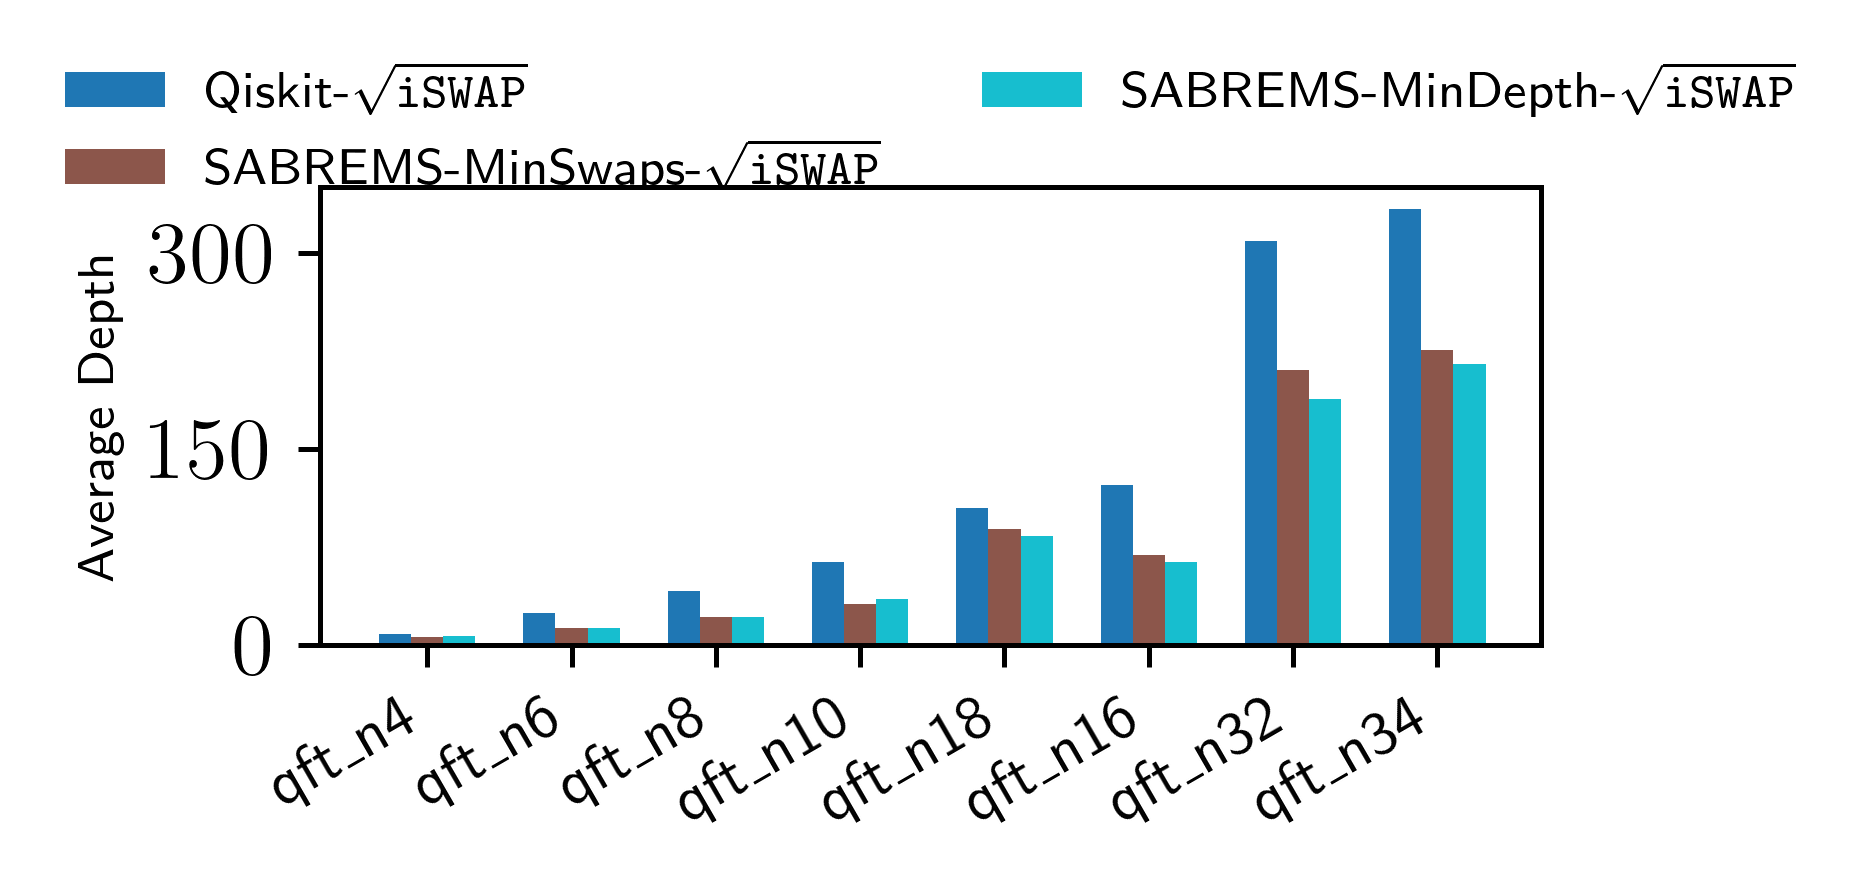

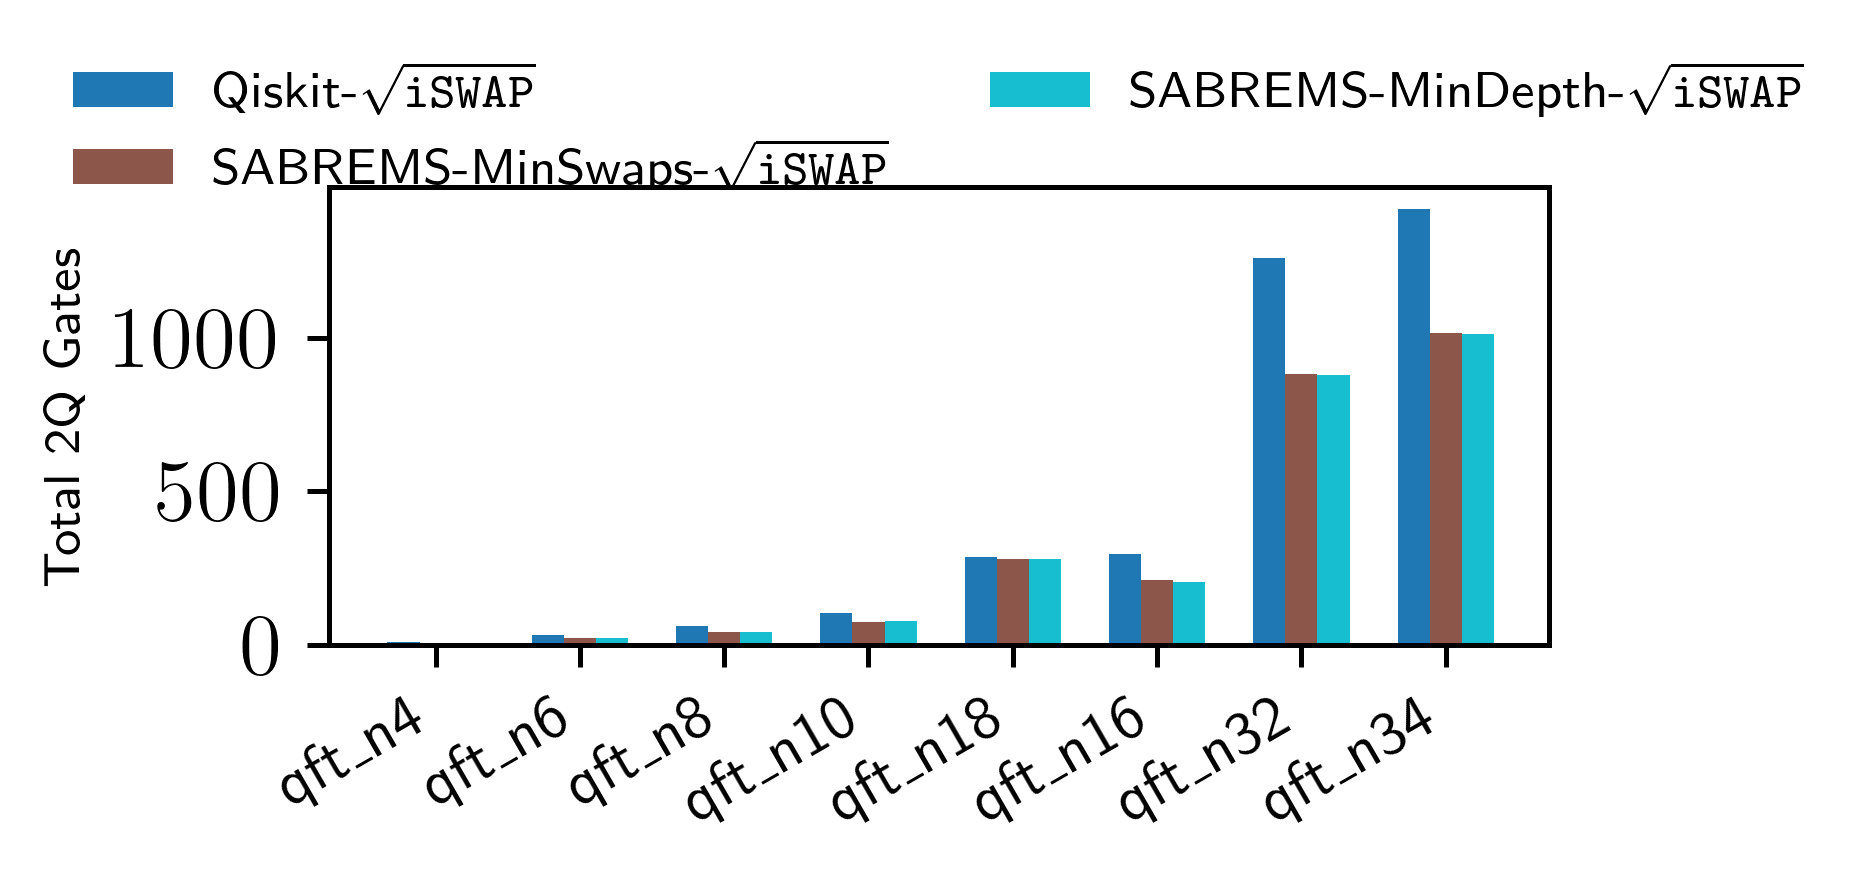

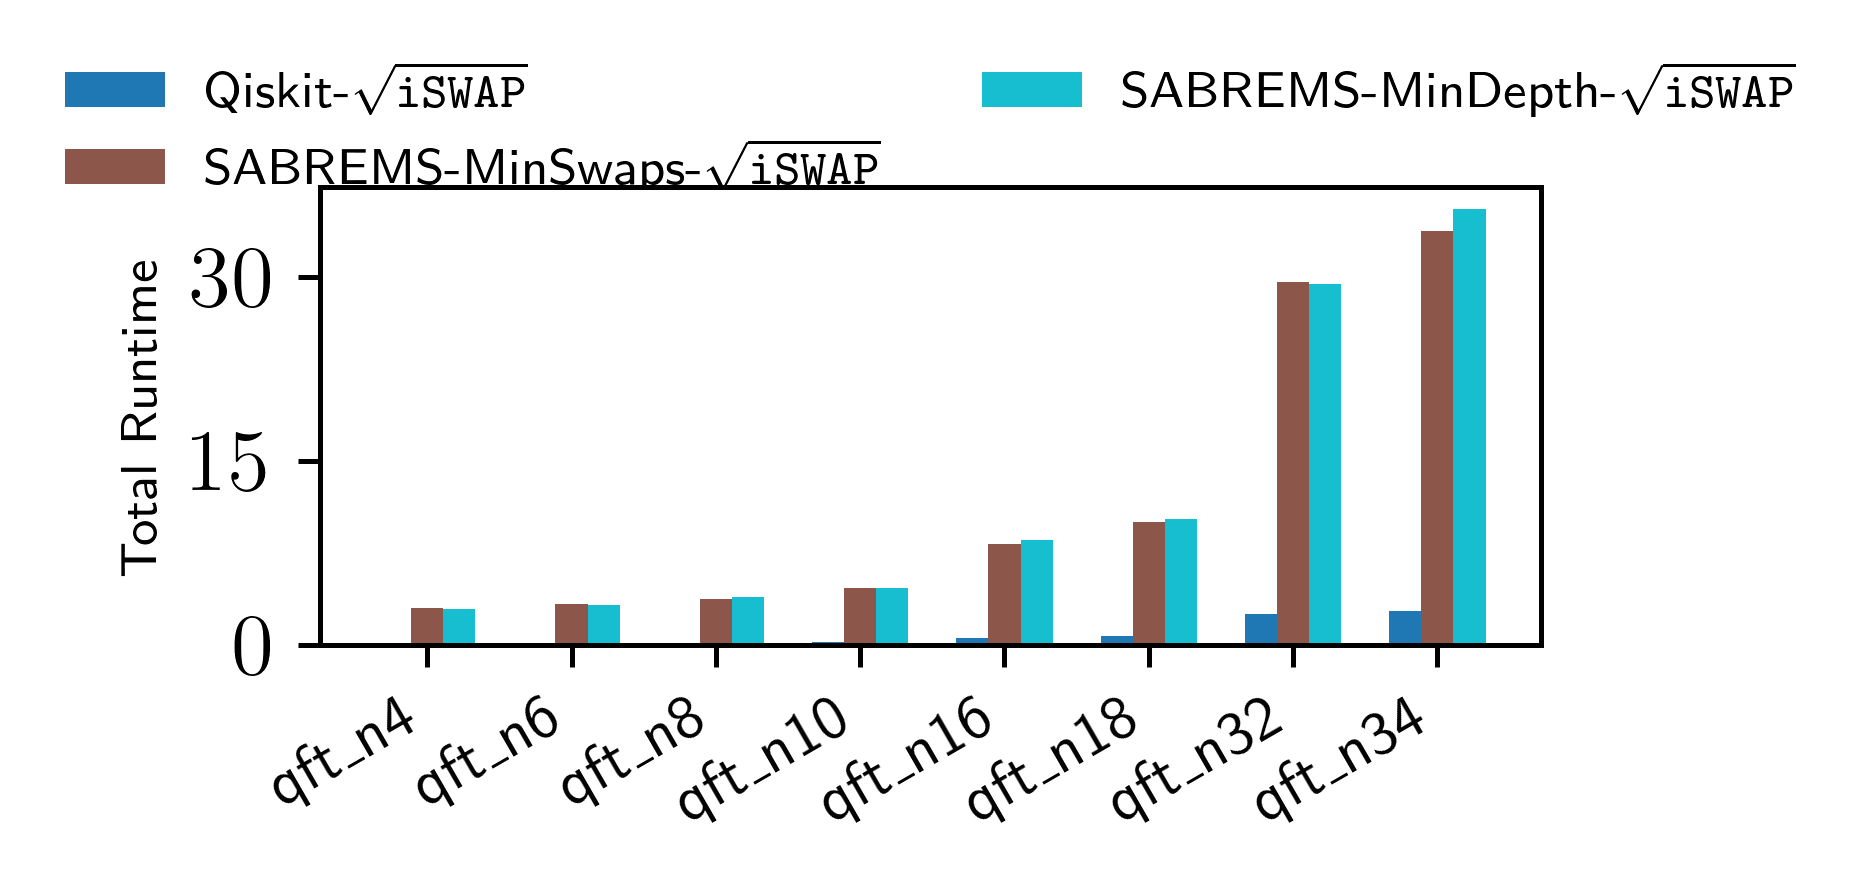

In [6]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="post")

In [7]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: monodromy_depth
  Circuit: qft_n10                                  Mean result: 63.196                         Trials: [70.5, 60.0, 62.5, 61.5, 63.0, 62.5, 62.5, 62.5, 62.5, 65.0]
  Circuit: qft_n16                                  Mean result: 122.140                        Trials: [95.0, 128.5, 141.5, 123.5, 130.0, 118.0, 124.5, 135.5, 107.5, 124.5]
  Circuit: qft_n18                                  Mean result: 104.706                        Trials: [78.5, 107.0, 97.0, 113.5, 98.5, 108.0, 130.5, 96.0, 102.0, 126.0]
  Circuit: qft_n32                                  Mean result: 309.263                        Trials: [343.0, 310.5, 302.5, 332.0, 265.5, 319.5, 347.0, 254.0, 293.5, 341.0]
  Circuit: qft_n34                                  Mean result: 333.603                        Trials: [371.0, 298.0, 336.0, 417.0, 282.5, 292.0, 352.5, 312.0, 390.0, 311.5]
  Circuit: qft_n4                                   Mean result: 8.48